# A2 - Descriptive statistics
Probability and Statistics<br>
Name(s): Adrian Garcia Castro, Ekaterina Chukina, Arijana Määttä<br>
Date: 01.11.2023<br>
[Helsinki Metropolia University of Applied Sciences](https://www.metropolia.fi/en)

## Setup

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

The following dataset contains heart disease related data. The variables are:
- age - patient's age (years)
- sex - patient's sex (1 = Male, 0 = Female)
- rest_blood_pressure - systolic blood pressure at rest (mmHg)
- serum_cholesterol - cholesterol level in blood serum (mg/dl)
- max_heart_rate - maximum heart rate at exerices (bpm = beat per minute)
- exercise_angina - chest pain (angina) at exerices (1 = Yes, 0 = No)
- heart_disease - classification of heart disease (0 = healthy, 1,2,3,4 = Heart disease)

More information about the dataset can be read here: [Heart disease dataset](https://archive.ics.uci.edu/dataset/45/heart+disease).

In [2]:
# Read the example data
file = "a2_data.csv"
data = pd.read_csv(file)

## Problem 1

By coding and interpreting the results find the answers to the following questions. Give the answers with two decimal accuracy.

a) How many patients were in this dataset?<br>
b) What was the average and the standard deviation of age?<br>
c) How many men and women were there?<br>
d) What was the range of the maximum heart rate?<br>
e) What where the minimum and maximum of the serum cholesterol values?

In [3]:
# a)
s = data.describe()
total_patients = s['age']['count']
print(f'There is {total_patients:.0f} patients in the data sheet.')

There is 303 patients in the data sheet.


In [4]:
# b)
average_age = data['age'].mean()
std_age = data['age'].std()
print(f'Average deviation of age = {average_age:.2f}')
print(f'Standard deviation of age = {std_age:.2f}')

Average deviation of age = 54.44
Standard deviation of age = 9.04


In [5]:
# c)
men = (data['sex'] == 1.0).sum()
women = (data['sex'] == 0.0).sum()
print(f'Men = {men}')
print(f'Women = {women}')

Men = 206
Women = 97


In [6]:
# d)
r = np.ptp(data['max_heart_rate'])
print(f'Range of max heart rate = {r:.2f}')

Range of max heart rate = 131.00


In [7]:
# e)
min = data['serum_cholesterol'].min()
max = data['serum_cholesterol'].max()
print(f'min = {min}')
print(f'max = {max}')

min = 126.0
max = 564.0


**Your answers**:

## Problem 2

Draw a histogram, boxplot and violinplot of the resting blood pressure values. Use the following array for the bins settings in the histogram `np.arange(80, 220, 10)`. Decorate the graphs, e.g. add labels, title, grid lines, etc.

Based on the graphs only (e.g. do not calculate anything!) estimate the statistics for the resting blood pressure values.

a) What was the median?<br>
b) What where the minimum and maximum?<br>
c) What was the interquartile range?<br>
d) What was the mode of the categories used in the histogram?<br>
e) Lastly, discuss how easy or difficult it was to estimate these statistics based on the graphics only.

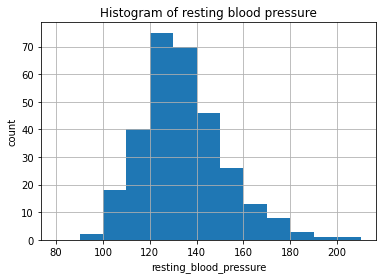

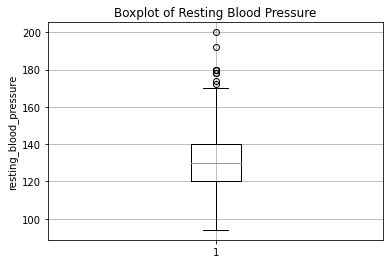

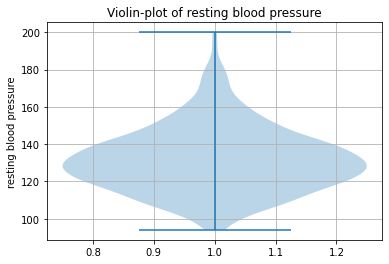

In [105]:
d = data['resting_blood_pressure']

# histogram
bins = np.arange(80, 220, 10)
plt.hist(d, bins)
plt.ylabel('count')
plt.xlabel('resting_blood_pressure')
plt.title('Histogram of resting blood pressure')
plt.grid(True)
plt.show()

# boxplot
plt.boxplot(d)
plt.title('Boxplot of Resting Blood Pressure')
plt.grid(True)
plt.ylabel('resting_blood_pressure')
plt.show()

# violinplot
plt.violinplot(d)
plt.title('Violin-plot of resting blood pressure')
plt.ylabel('resting_blood_pressure')
plt.grid(True)
plt.show()

**Your answers:** <br>
a) Median = 130 <br>
b) Min = 90  ; Max = 200<br>
c) Interquartile range = 20<br>
d) Mode = 120<br>
e) Estimating stats from graphs gives a rough idea, with median and mode easier to estimate. Yet, accuracy suffers without clear scales. For precision, direct data calculation is essential.

## Problem 3
Compare the *serum cholesterol* to the *resting blood pressure*.

By coding:
- Create a scatter-plot where *resting blood pressure* is in the x-axis and *serum cholesterol* in y-axis.
- Count what proportion of the data have *serum cholesterol* higher than 350 mg/ml.
- Count what proportion of the data have *resting blood pressure* higher than 190 mmHg.

Explain:
- By studying the graph and calculations evaluate if there are any outliers. Explain in your own words which values could be the outliers and why.

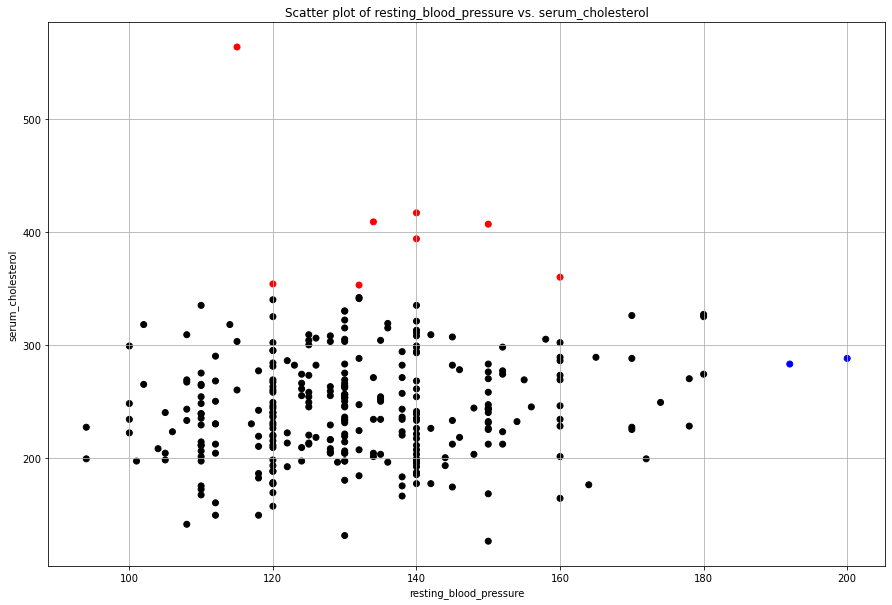

In [8]:
# scatter-plot

d = data['resting_blood_pressure']
e = data['serum_cholesterol']

# Assigning colors based on cholesterol and blood pressure values (better readability)
colors = ['red' if e[i] > 350 else 'blue' if d[i] > 190 else 'black' for i in range(len(e))]
plt.figure(figsize = (15,10))
plt.scatter(d,e, c = colors)
plt.title('Scatter plot of resting_blood_pressure vs. serum_cholesterol')
plt.xlabel('resting_blood_pressure')
plt.ylabel('serum_cholesterol')
plt.grid()
plt.show()

In [124]:
# counting proportion
ch = (e > 350).mean()
bp = (d > 190).mean()

print(f"Proportion of patients with serum cholesterol > 350 mg/ml: {ch}")
print(f"Proportion of patients with resting blood pressure > 190 mmHg: {bp}\n")

ch_percentage = ch * 100
bp_percentage = bp * 100

print(f"Percentage of patients with serum cholesterol > 350 mg/ml: {ch_percentage:.2f}%")
print(f"Percentage of patients with resting blood pressure > 190 mmHg: {bp_percentage:.2f}%")


Proportion of patients with serum cholesterol > 350 mg/ml: 0.026402640264026403
Proportion of patients with resting blood pressure > 190 mmHg: 0.006600660066006601

Percentage of patients with serum cholesterol > 350 mg/ml: 2.64%
Percentage of patients with resting blood pressure > 190 mmHg: 0.66%


**Your answer**:<br>
Proportion of the data have serum cholesterol higher than 350 mg/ml: ~0.0264</br>
Proportion of the data have resting blood pressure higher than 190 mmHg: ~0.0066</br></br>

There are clearly some outliers that are too far from the main "gathering" of the values. The first one and the farthest is around 120 on "Resting Blood Pressure" and more than 500 on the "Serum Cholesterol". There are also two on the right of the graph, which are around 200 on "Resting Blood Pressure" and near 300 on "Serum Cholesterol". These three dots are the most separated from the others, therefore, outliers.